# Reddit DataViz Battle for Nov 2018

In [292]:
import pandas as pd
import numpy as np

import bokeh
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import NASA data
df_astro = pd.read_csv("./data/NASA astronauts - US ASTRONAUTS.csv")

In [3]:
# Inspect data for contents and get an idea of what can be done
df_astro.head()

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Cumulative hours of space flight time
0,"Carpenter, M. Scott",1959,1,1,Former,Military,Male,"Commander, US Navy (Retired)",5/1/1925,NaN,Mercury 7,4
1,"Williams, Clifton C., Jr.",1963,3,0,Deceased,Military,Male,"Major, US Marine Corps",9/26/1932,NaN,NaN,0
2,"Worden, Alfred M.",1966,5,1,Former,Military,Male,"Colonel, US Air Force",2/7/1932,NaN,Apollo 15,295
3,"Williams, Donald E.",1978,8,2,Former,Military,Male,"Captain, US Navy",2/13/1942,NaN,STS 51-D and STS-34,287
4,"Wilcutt, Terrence W.",1990,13,4,Current,Military,Male,"Colonel, US Marine Corps (Retired)",10/31/1949,Pilot,"STS-68, STS-79, STS-89 and STS-106",1007


In [4]:
# Check datatypes for possible issues, looks like [# Flights, and Hrs in Space] should be numeric and not strings
df_astro.dtypes

Astronaut                                object
Selection Year                            int64
 Group                                    int64
 # Flights                               object
Status                                   object
Military or civilian                     object
Gender                                   object
If military include details              object
Date of birth                            object
Job                                      object
Missions flown                           object
Cumulative hours of space flight time    object
dtype: object

In [5]:
# We're going to be using hrs in space a lot, so lets shorten the name of the column
df_astro['Hr in Space'] = df_astro['Cumulative hours of space flight time']
df_astro.drop(labels='Cumulative hours of space flight time', axis=1, inplace=True)

In [6]:
# Remove spaces in title
df_astro.columns = [col.strip() for col in df_astro.columns]

In [7]:
# Check out issues with number of flight column
df_astro['# Flights'].value_counts()

2     45
1     39
2     39
4     38
1     36
3     34
3     23
0     20
0     18
4     17
5     16
6      4
5      2
7      2
6      1
       1
Name: # Flights, dtype: int64

In [8]:
# Set blank spaces to 0 and change to integers
df_astro['# Flights'] = df_astro['# Flights'].apply(lambda x : 0 if x == ' ' else int(x))
df_astro['# Flights'].value_counts()

2    84
1    75
3    57
4    55
0    39
5    18
6     5
7     2
Name: # Flights, dtype: int64

In [110]:
# Convert hours in space to numeric and fill in null values
df_astro['Hr in Space'].fillna(0,inplace=True)
df_astro['Hr in Space'] = df_astro['Hr in Space'].apply(lambda x : 0 if x == ' ' else int(x))

In [10]:
# make ages column
df_astro['Birht Year'] = df_astro['Date of birth'].apply(lambda x : int(x[-4:]))

In [11]:
df_astro['Age'] = df_astro['Selection Year'] - df_astro['Birht Year']

In [19]:
# Fix Status by removing extra spaces in values
df_astro['Status'] = df_astro['Status'].apply(lambda x : x.strip())

In [83]:
# Check what the null values are for the Mil or Cil column and see what we can do about it
df_astro.loc[df_astro['Military or civilian'].isnull(),:]

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Hr in Space,Birht Year,Age
16,"Hansen, Jeremy",2009,20,0,Candidate,NaN,Male,NaN,1/27/1976,NaN,NaN,0,1976,33
26,"Yui, Kimiya",2009,20,0,Candidate,NaN,Male,NaN,1970,NaN,NaN,0,1970,39


In [ ]:
# Colonel Hansen was a member of the Canadian Military
# Lt Colonel Yui was a member of the Japanese Air Defense
# We'll fill these in as Military 

In [85]:
# Fix Military
df_astro['Military or civilian'].fillna("Military",inplace=True)
df_astro['Military or civilian'] = df_astro['Military or civilian'].apply(lambda x : x.strip())

In [86]:
# Final check to see what 
df_astro.head()

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Hr in Space,Birht Year,Age
0,"Carpenter, M. Scott",1959,1,1,Former,Military,Male,"Commander, US Navy (Retired)",5/1/1925,NaN,Mercury 7,4,1925,34
1,"Williams, Clifton C., Jr.",1963,3,0,Deceased,Military,Male,"Major, US Marine Corps",9/26/1932,NaN,NaN,0,1932,31
2,"Worden, Alfred M.",1966,5,1,Former,Military,Male,"Colonel, US Air Force",2/7/1932,NaN,Apollo 15,295,1932,34
3,"Williams, Donald E.",1978,8,2,Former,Military,Male,"Captain, US Navy",2/13/1942,NaN,STS 51-D and STS-34,287,1942,36
4,"Wilcutt, Terrence W.",1990,13,4,Current,Military,Male,"Colonel, US Marine Corps (Retired)",10/31/1949,Pilot,"STS-68, STS-79, STS-89 and STS-106",1007,1949,41


## Start Plotting

In [13]:
plt.style.use("dark_background")

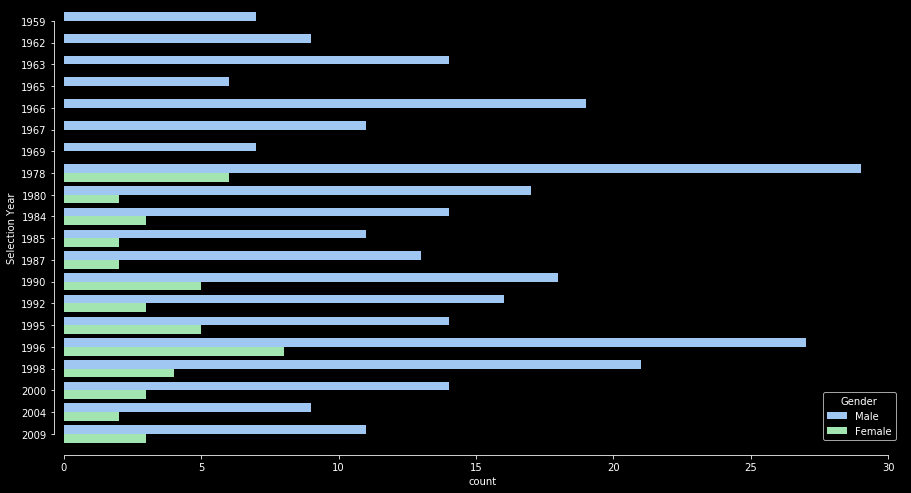

In [199]:

fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(y="Selection Year", 
              data=df_astro,
              hue='Gender',
              ax=ax
             )


sns.despine(offset=10, trim=True)

### Age by Gender and Status

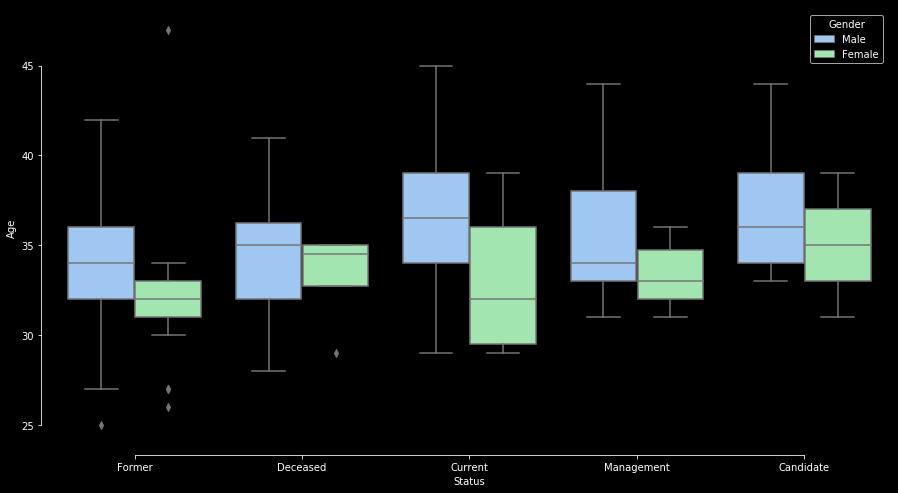

In [137]:
fig, ax = plt.subplots(figsize=(15,8))

sns.boxplot(x="Status", 
            y="Age", 
            hue="Gender", 
            data=df_astro, 
            palette="pastel",
            ax=ax
           )
sns.despine(offset=10, trim=True)

In [140]:
# WHO IS THE OUTLIER THAT BECAME AN ASTRONAUT AT 47?!
df_astro['Age'].sort_values(ascending=False).head()

298    47
278    45
275    44
294    44
331    44
Name: Age, dtype: int64

In [141]:
df_astro.iloc[298,:]

Astronaut                      Morgan, Barbara R. 
Selection Year                                1998
Group                                           17
# Flights                                        1
Status                                      Former
Military or civilian                      Civilian
Gender                                      Female
If military include details                    NaN
Date of birth                           11/28/1951
Job                             Mission Specialist
Missions flown                             STS-118
Hr in Space                                    305
Birht Year                                    1951
Age                                             47
Name: 298, dtype: object

_Barbara Morgan was the backup to Christa McAuliffe as part of the __Teachers in Space Project__ back in 1985. McAuliffe was part of the crew for the ill-fated Space Shuttle __Challenger__ mission in 1986._

### Longest Time in Space by Selection Year

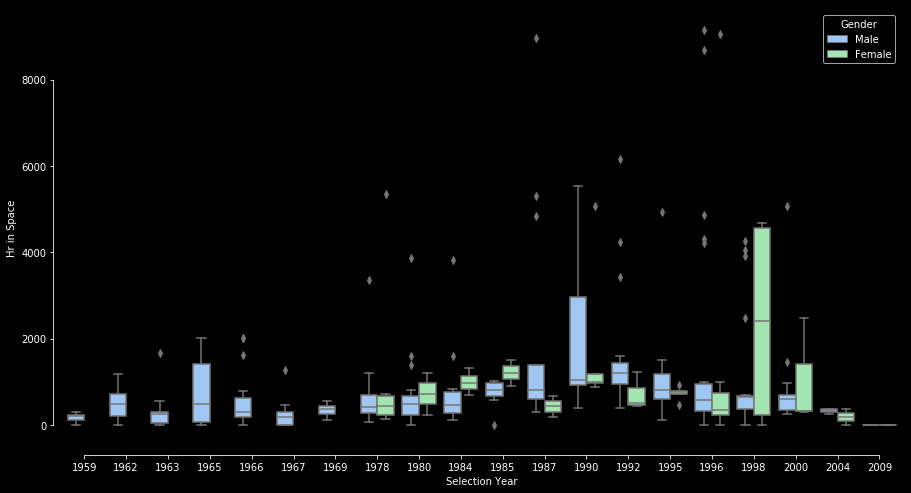

In [15]:
# Longest Time in space by Selection Year
fig, ax = plt.subplots(figsize=(15,8))

sns.boxplot(x="Selection Year", 
            y="Hr in Space", 
            hue="Gender", 
            data=df_astro, 
            palette="pastel",
            ax=ax
           )
sns.despine(offset=10, trim=True)

_1978 was the first year when women were selected in a group. The group included notable astronaunts Sally Ride, Shannon Lucid, Anna Lee Fisher, and Judith Resnik._

In [20]:
df_astro.loc[df_astro['Selection Year'] == 1978,:]

,Astronaut,Selection Year,Group,# Flights,Status,Military or civilian,Gender,If military include details,Date of birth,Job,Missions flown,Hr in Space,Birht Year,Age
3,"Williams, Donald E.",1978,8,2,Former,Military,Male,"Captain, US Navy",2/13/1942,NaN,STS 51-D and STS-34,287,1942,36
97,"Bluford, Guion S., Jr.",1978,8,4,Former,Military,Male,"Colonel, US Air Force",11/22/1942,NaN,"STS-8, STS 61-A, STS-39 and STS-53",688,1942,36
98,"Brandenstein, Daniel C.",1978,8,4,Former,Military,Male,"Captain, US Navy (Retired)",1/17/1943,NaN,"STS-8, STS 51-G, STS-32 and STS-49",789,1943,35
99,"Buchli, James F.",1978,8,4,Former,Military,Male,"Colonel, US Marine Corps (Retired)",6/20/1945,NaN,"STS 51-C, STS 61-A, STS-29 and STS-48",490,1945,33
100,"Coats, Michael L.",1978,8,3,Former,Military,Male,"Captain, US Navy (Retired)",1/16/1946,NaN,"STS 41-D, STS-29 and STS-39",463,1946,32
101,"Covey, Richard O.",1978,8,4,Former,Military,Male,"Colonel, US Air Force",8/1/1946,NaN,"STS 51-l, STS-26, STS-38 and STS-61",645,1946,32
102,"Creighton, John O.",1978,8,3,Former,Military,Male,"Captain, US Navy",4/28/1943,NaN,"STS 51-G, STS-36 and STS-48",404,1943,35
103,"Fabian, John M.",1978,8,2,Former,Military,Male,"Colonel, US Air Force",1/28/1939,NaN,STS-7 and STS 51-G,316,1939,39
104,"Fisher, Anna L.",1978,8,1,Current,Civilian,Female,NaN,8/24/1949,Mission Specialist,STS 51-A,191,1949,29
105,"Gardner, Dale A.",1978,8,2,Former,Military,Male,"Captain, US Navy",11/8/1948,NaN,STS-8 and STS 51-A,336,1948,30


### Hours in Space by Gender and Service

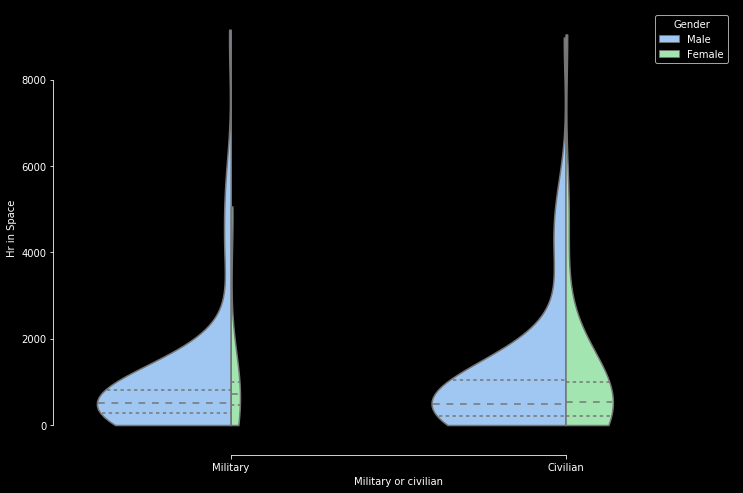

In [156]:
plt.figure(figsize=(12,8))

sns.violinplot(x='Military or civilian', 
               y='Hr in Space', 
               hue='Gender',
               data=df_astro,
               split=True, 
               scale="count",
               inner="quartile",
               cut=0,
               bw=0.6,
               palette="pastel"
              )
sns.despine(offset=10, trim=True);

### Ages of astronaunts

/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '
/Users/macbookpro/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axe

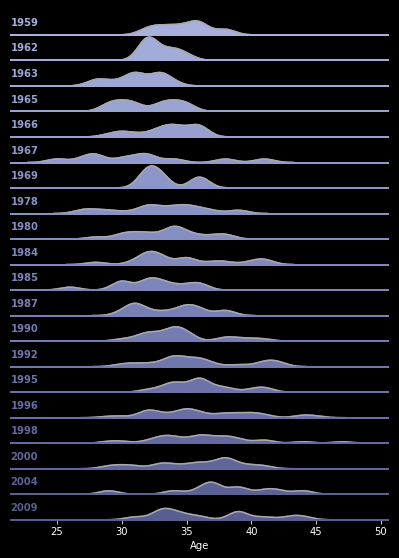

In [108]:
#sns.set(rc={"axes.facecolor": (0, 0, 0, 0)})

groups = list(sorted(df_astro['Group'].unique()))

#set palette
pal = sns.cubehelix_palette(len(groups)*1.7, rot=-.05, light=.7)
#set grid for each year
g = sns.FacetGrid(df_astro, row="Selection Year", hue="Selection Year", size=0.4,aspect=15, palette=pal)

# Draw the densities of age for each year
g.map(sns.kdeplot, "Age", clip_on=False, shade=True, alpha=1, lw=1.5, bw=0.75)
g.map(sns.kdeplot, "Age", clip_on=False, color="darkgrey", lw=1.5, bw=0.75)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax1 = plt.gca()
    ax1.text(0, 0.5, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax1.transAxes)


g.map(label, "Age")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=.04)

# Remove axes details that aren't necessary
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [200]:
# Sankey Plot (of categories)
import plotly.plotly as py

In [232]:
df_gender = pd.get_dummies(df_astro['Gender'], drop_first=True)
df_service = pd.get_dummies(df_astro['Military or civilian'], drop_first=True)

In [261]:
gen_to_service = list(df_astro.groupby(['Gender','Military or civilian'])['Astronaut'].count())

In [263]:
df_astro.groupby(['Military or civilian','Status'])['Astronaut'].count()

Military or civilian  Status    
Civilian              Candidate       6
                      Current        36
                      Deceased       12
                      Former         70
                      Management     10
Military              Candidate       9
                      Current        43
                      Deceased       28
                      Former        110
                      Management     11
Name: Astronaut, dtype: int64

In [262]:
service_to_status = list(df_astro.groupby(['Military or civilian','Status'])['Astronaut'].count())

In [283]:
data = dict(
    type='sankey',
    node = dict(
      pad = 15,
      thickness = 10,
      line = dict(
        color = "white",
        width = 0.5
      ),
        label = ["Male", 
                 "Female", 
                 "Military", 
                 "Civilian", 
                 'Deceased', 
                 "Former",
                 'Management' ,
                 'Current', 
                 'Candidate'],
        color = ['92C6FF', '97F0AA', 'FF9F9A', 'D0BBFF', 'FFFEA3', 'B0E0E6']
    ),
    link = dict(
      source = [1,1,0,0,3,3,3,3,3,2,2,2,2,2],
      target = [3,2,3,2,8,7,4,5,6,8,7,4,5,6],
      value = gen_to_service + service_to_status
    ),
  )

layout =  dict(
    title = "ASTRONAUT BREAKDOWN",
    font = dict(
        family='futura',
      size = 15,
      color = 'white'
    ),
    plot_bgcolor = 'white',
    paper_bgcolor = 'black',

)

fig = dict(data=[data], layout=layout)
py.iplot(fig, validate=False)

In [ ]:
# Times around the Earth

In [288]:
df_space = df_astro.loc[df_astro['Hr in Space'] > 0,:].sort_values('Hr in Space',ascending = False)

In [356]:
df_chart = df_space.loc[:,['Astronaut','Selection Year','Hr in Space']]

In [357]:
df_chart.to_csv('./data/time_in_space.csv')

In [298]:
import plotly.graph_objs as go

In [362]:

data = []
counter = 0
for col in df_chart.columns:
    if col != 'Astronaut':
        rgb = 'rgb('
        for code in [int(val*255) for val in pal[counter]]:
            rgb = rgb + str(code) + ','
        rgb = rgb[:-1] + ')'
        data.append(
            go.Area(t=df_chart['Astronaut'],
                    r=df_chart['Hr in Space'],
                    
                    marker=dict(color=rgb) ) )
        counter+=1

layout =  dict(
    title = "Time in Space",
    font = dict(
        family='futura',
      size = 15,
      color = 'white'
    ),
    plot_bgcolor = 'black',
    paper_bgcolor = 'black',

)
        
fig = go.Figure(data=data, layout=layout)

#IPython notebook
py.iplot(fig, validate=False)

#url = py.plot(fig, filename='Time in Space')